In [2]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import astropy.io.fits
import numpy as np
import sys
import glob
sys.path.append("../src/")

# Import ccf code
import ccf
import mask

## Grab some GJ699 files

In [3]:
files = glob.glob('/gpfs/group/cfb12/default/hpfrvs/hpfdata/20181203_gj699_rvs_2/*.fits')
files[0:4]

[]

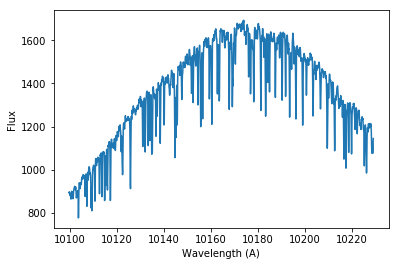

In [3]:
# Quickly get wavelengths and fluxes
# In principle we shoudl be using the sky-subtracted and flat fielded data here. 
# Just doing this to quickly illustrate how the code works
filename = files[0]
berv = 21. #km/s for file 0
w = astropy.io.fits.open(filename)[7].data
f = astropy.io.fits.open(filename)[1].data

fig, ax = plt.subplots()
o = 15
ax.plot(w[o],f[o])
ax.set_xlabel("Wavelength (A)")
ax.set_ylabel("Flux")

In [4]:
# Define mask
M = mask.Mask(filename="../data/hpf/masks/gj699.mas",disp=2.,constant_v=True)

# Define velocity to 
v = np.linspace(-15,15,161)

AIRTOVAC (TRUE for HARPS, FALSE TRUE HPF):  False


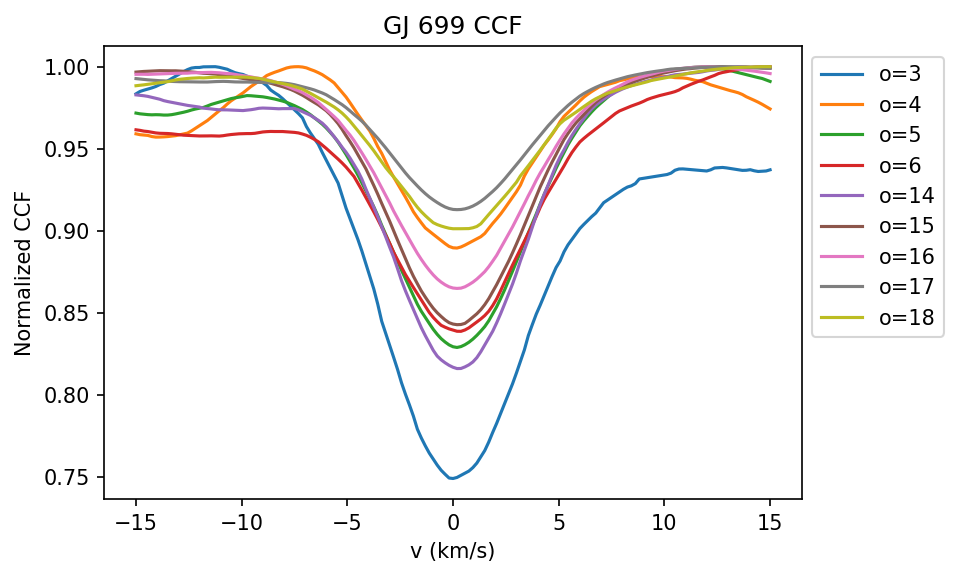

In [9]:
orders = [3,4,5,6,14,15,16,17,18]

fig, ax = plt.subplots(dpi=150)

for o in orders:
    c = ccf.calculate_ccf(w[o],f[o],v,M.wi,M.wf,M.weight,berv=21.,doppler_3d=True)
    ax.plot(v,c/np.max(c),label="o={}".format(o))

ax.set_ylabel("Normalized CCF")
ax.set_xlabel("v (km/s)")
ax.set_title("GJ 699 CCF")
ax.legend(bbox_to_anchor=(1.,1.))

# Using convenience function

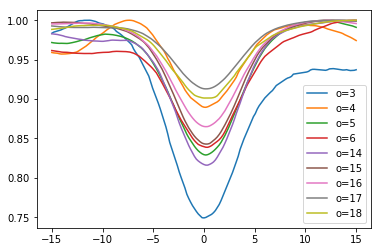

In [19]:
ccfs = ccf.calculate_ccf_for_hpf_orders(w,f,v,M,berv=21.,orders=[3, 4, 5, 6, 14, 15, 16, 17, 18],plot=True)